In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, median_absolute_error,r2_score

 Leer el conjunto de datos desde el archivo Excel

In [154]:
df = pd.read_excel('../probandtetssdhj.xlsx')

# Obtener el número de filas
num_filas = df.shape[0]
print(f'Número de instancias: {num_filas}')
# Obtener el número de column#as
num_columnas = df.shape[1]
print(f'Número de propiedades: {num_columnas}')

# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)
# Obtener estadísticas resumidas de las propiedades numéricas
resumen_estadisticas = df.describe()
print('Estadísticas resumidas:\n', resumen_estadisticas)
df = df.drop(['E1', 'E2','E3','E4','E5','Plantas','hectareas','date','lote','Id_Lote','Cherelles','perdida'],axis=1)

Número de instancias: 840
Número de propiedades: 29
Nombres de propiedades: Index(['date', 'lote', 'Id_Lote', 'edad', 'Plantas', 'hectareas', 'E1', 'E2',
       'E3', 'E4', 'E5', 'Cherelles', 'grade_monilla', 'perdida', 'qq',
       'Evapotranspiration_Crop', 'Nvdi', 'Relat_Hum_Max_Temp', 'Temp_Air_Max',
       'Temp_Air_Min', 'Dew_Temp_Max', 'Precipitacion', 'Sunshine_Duration',
       'Total_E1', 'Total_E2', 'Total_E3', 'Total_E4', 'Total_E5', 'lost'],
      dtype='object')
Estadísticas resumidas:
           Id_Lote        edad       Plantas   hectareas          E1  \
count  840.000000  840.000000    840.000000  840.000000  840.000000   
mean    35.500000   10.942857   7282.157143    6.475429   12.072619   
std     20.217235    2.028773   2325.691941    2.230520   29.183497   
min      1.000000    2.000000   1655.000000    0.000000    0.000000   
25%     18.000000   11.000000   5999.000000    5.240000    0.000000   
50%     35.500000   11.000000   7493.500000    6.745000    0.000000 

 Visualizar relaciones entre las variables mediante un pairplot

Convirtiendo en variables categoricas el mes y año

In [155]:
#sns.pairplot(df, diag_kind='kde')
#plt.show()

matriz de correlación para cuantificar la relación lineal entre las variables:

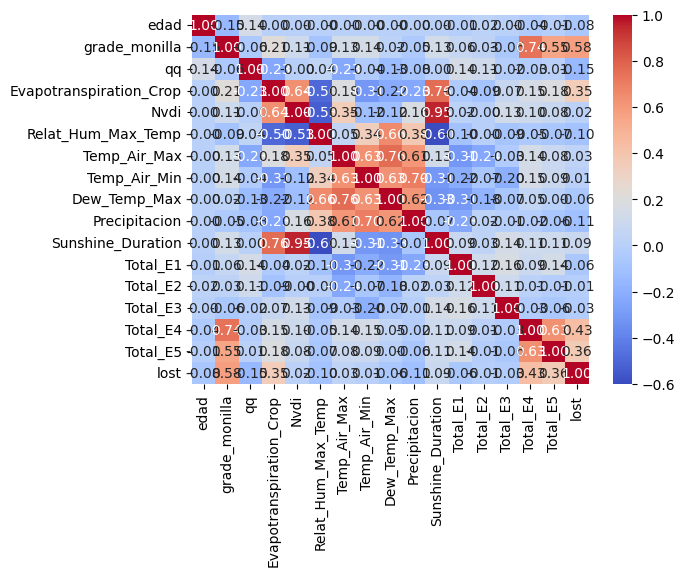

In [156]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Aplicando  SVM y egresion lineal simple en un enfoque de regresion lineal

In [157]:
df = df.fillna(0)
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [edad, grade_monilla, qq, Evapotranspiration_Crop, Nvdi, Relat_Hum_Max_Temp, Temp_Air_Max, Temp_Air_Min, Dew_Temp_Max, Precipitacion, Sunshine_Duration, Total_E1, Total_E2, Total_E3, Total_E4, Total_E5, lost]
Index: []


In [158]:
X = df.drop(['qq'], axis=1)
y = df['qq']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Crear un DataFrame para almacenar las métricas

# SVM Regresión
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_explained_variance = explained_variance_score(y_test, svm_predictions)
svm_medae = median_absolute_error(y_test, svm_predictions)

# Regresión Lineal Simple
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_explained_variance = explained_variance_score(y_test, linear_predictions)
linear_medae = median_absolute_error(y_test, linear_predictions)

print("Métricas de SVM Regresión:")
print("Mean Squared Error (MSE):", svm_mse)
print("R2 Score:", svm_r2)
print("Mean Absolute Error (MAE):", svm_mae)
print("Root Mean Squared Error (RMSE):", svm_rmse)
print("Explained Variance Score:", svm_explained_variance)
print("Median Absolute Error (MedAE):", svm_medae)
print("\n")

print("Métricas de Regresión Lineal Simple:")
print("Mean Squared Error (MSE):", linear_mse)
print("R2 Score:", linear_r2)
print("Mean Absolute Error (MAE):", linear_mae)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("Explained Variance Score:", linear_explained_variance)
print("Median Absolute Error (MedAE):", linear_medae)



Métricas de SVM Regresión:
Mean Squared Error (MSE): 60.65428048422401
R2 Score: 0.12371422049906067
Mean Absolute Error (MAE): 5.183692798921371
Root Mean Squared Error (RMSE): 7.788085803599239
Explained Variance Score: 0.23078604676130887
Median Absolute Error (MedAE): 3.5774564060315224


Métricas de Regresión Lineal Simple:
Mean Squared Error (MSE): 57.63401808062841
R2 Score: 0.16734861816239677
Mean Absolute Error (MAE): 5.397666475366541
Root Mean Squared Error (RMSE): 7.591707191444386
Explained Variance Score: 0.18857625862618366
Median Absolute Error (MedAE): 3.9204907810608


Graficos de la prediccion

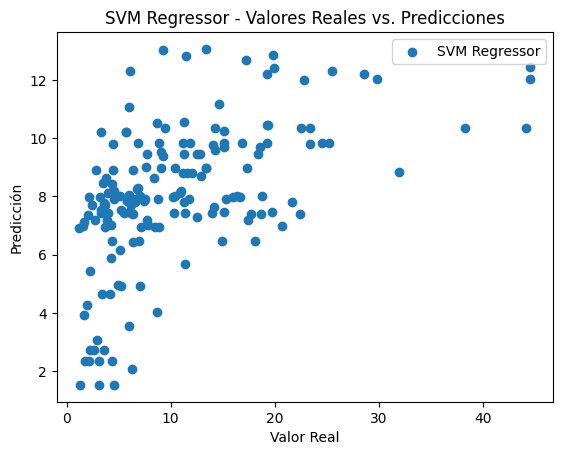

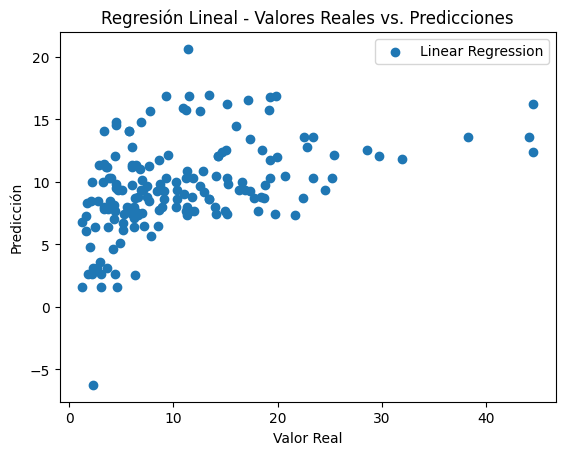

In [159]:
# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('SVM Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión Lineal - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Regresion no lineal
Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)
# Calcular métricas para Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)

# Imprimir las métricas
print("Métricas de Random Forest Regressor:")
print("Mean Squared Error (MSE):", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Explained Variance Score:", rf_explained_variance)
print("Median Absolute Error (MedAE):", rf_medae)


Métricas de Random Forest Regressor:
Mean Squared Error (MSE): 44.52127425078384
R2 Score: 0.3567913228915399
Mean Absolute Error (MAE): 4.714113599520941
Root Mean Squared Error (RMSE): 6.672426414040386
Explained Variance Score: 0.38294306224464636
Median Absolute Error (MedAE): 3.296516249999997


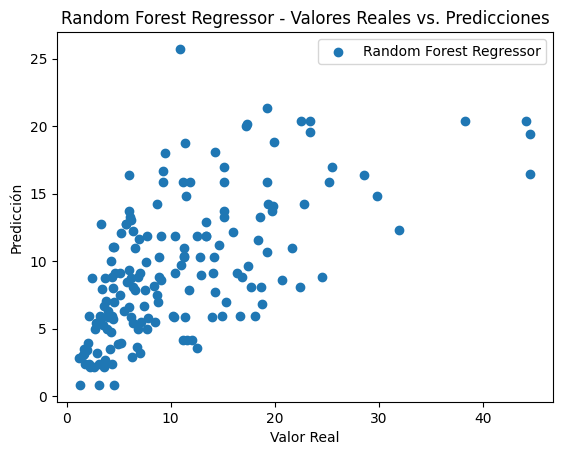

In [161]:
# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Random Forest Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Gradient Boosting

Métricas de Gradient Boosting Regressor:
Mean Squared Error (MSE): 44.43335497804249
R2 Score: 0.3580615120328875
Mean Absolute Error (MAE): 4.636009550606339
Root Mean Squared Error (RMSE): 6.665834904799435
Explained Variance Score: 0.37961125619715774
Median Absolute Error (MedAE): 3.3778468010238036


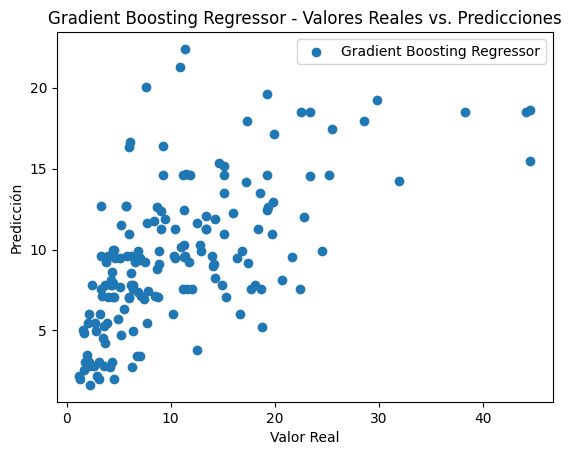

In [162]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Crear un modelo de Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
gb_predictions = gb_regressor.predict(X_test)
# Calcular métricas para Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_explained_variance = explained_variance_score(y_test, gb_predictions)
gb_medae = median_absolute_error(y_test, gb_predictions)

# Imprimir las métricas
print("Métricas de Gradient Boosting Regressor:")
print("Mean Squared Error (MSE):", gb_mse)
print("R2 Score:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("Explained Variance Score:", gb_explained_variance)
print("Median Absolute Error (MedAE):", gb_medae)

# Gráfico para Gradient Boosting Regressor
plt.scatter(y_test, gb_predictions, label='Gradient Boosting Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gradient Boosting Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


RNN

Epoch 1/50
17/17 [==============================] - 7s 70ms/step - loss: 116.9094 - val_loss: 118.7490
Epoch 2/50
17/17 [==============================] - 0s 19ms/step - loss: 60.0475 - val_loss: 75.0699
Epoch 3/50
17/17 [==============================] - 0s 19ms/step - loss: 50.3714 - val_loss: 71.7337
Epoch 4/50
17/17 [==============================] - 0s 18ms/step - loss: 45.9414 - val_loss: 65.6385
Epoch 5/50
17/17 [==============================] - 0s 19ms/step - loss: 43.5042 - val_loss: 68.0353
Epoch 6/50
17/17 [==============================] - 0s 22ms/step - loss: 41.7903 - val_loss: 63.0108
Epoch 7/50
17/17 [==============================] - 0s 27ms/step - loss: 41.1492 - val_loss: 64.0197
Epoch 8/50
17/17 [==============================] - 1s 32ms/step - loss: 42.6773 - val_loss: 62.6566
Epoch 9/50
17/17 [==============================] - 1s 34ms/step - loss: 41.0321 - val_loss: 67.4065
Epoch 10/50
17/17 [==============================] - 0s 23ms/step - loss: 39.6596 - val_l

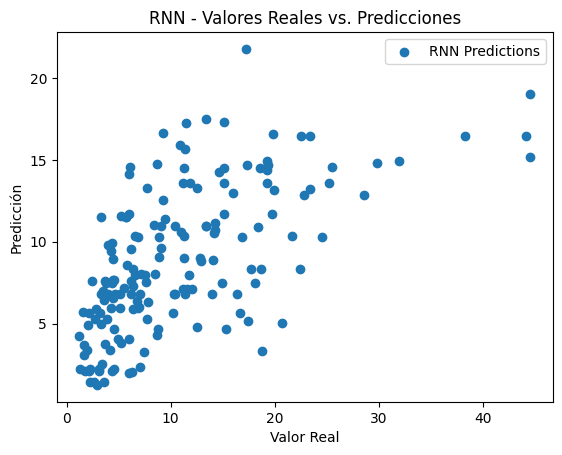

In [163]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una RNN

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Construir el modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape de los datos para que sean compatibles con la entrada de la RNN
X_train_rnn_reshaped = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn_reshaped = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))

# Entrenar el modelo
history = model.fit(X_train_rnn_reshaped, y_train_rnn, epochs=50, batch_size=32, validation_data=(X_val_rnn_reshaped, y_val_rnn))

# Realizar predicciones en el conjunto de prueba
X_test_rnn_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rnn_predictions = model.predict(X_test_rnn_reshaped)

rnn_predictions_flat = rnn_predictions.flatten()  # Definir rnn_predictions_flat

# Calcular métricas para RNN
rnn_mse = mean_squared_error(y_test, rnn_predictions_flat)
rnn_r2 = r2_score(y_test, rnn_predictions_flat)
rnn_mae = mean_absolute_error(y_test, rnn_predictions_flat)
rnn_rmse = mean_squared_error(y_test, rnn_predictions_flat, squared=False)
rnn_explained_variance = explained_variance_score(y_test, rnn_predictions_flat)
rnn_medae = median_absolute_error(y_test, rnn_predictions_flat)

# Imprimir las métricas
print("Métricas de Red Neuronal Recurrente (RNN):")
print("Mean Squared Error (MSE):", rnn_mse)
print("R2 Score:", rnn_r2)
print("Mean Absolute Error (MAE):", rnn_mae)
print("Root Mean Squared Error (RMSE):", rnn_rmse)
print("Explained Variance Score:", rnn_explained_variance)
print("Median Absolute Error (MedAE):", rnn_medae)

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RNN - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Epoch 1/50
17/17 [==============================] - 39s 88ms/step - loss: 129.2153 - val_loss: 167.0008
Epoch 2/50
17/17 [==============================] - 0s 26ms/step - loss: 120.5388 - val_loss: 149.1758
Epoch 3/50
17/17 [==============================] - 0s 28ms/step - loss: 129.3608 - val_loss: 148.3820
Epoch 4/50
17/17 [==============================] - 1s 35ms/step - loss: 106.4701 - val_loss: 136.8587
Epoch 5/50
17/17 [==============================] - 1s 76ms/step - loss: 108.2964 - val_loss: 140.7540
Epoch 6/50
17/17 [==============================] - 0s 29ms/step - loss: 101.5352 - val_loss: 132.1563
Epoch 7/50
17/17 [==============================] - 0s 28ms/step - loss: 95.2366 - val_loss: 123.3622
Epoch 8/50
17/17 [==============================] - 0s 26ms/step - loss: 90.1441 - val_loss: 116.6543
Epoch 9/50
17/17 [==============================] - 2s 104ms/step - loss: 83.6954 - val_loss: 109.2577
Epoch 10/50
17/17 [==============================] - 0s 30ms/step - loss: 

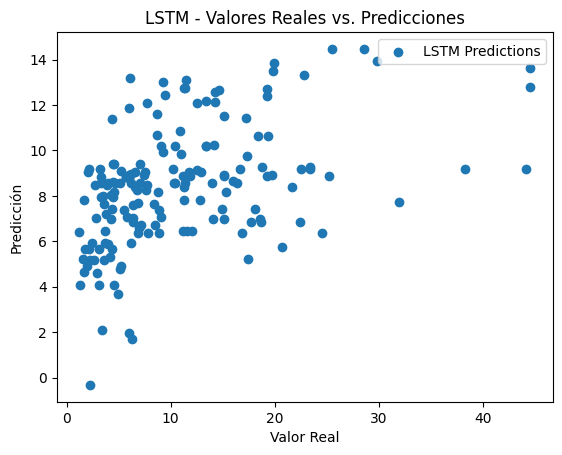

In [164]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una LSTM

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Reshape de los datos para que sean compatibles con la entrada de la LSTM
X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_val_lstm_reshaped = X_val_lstm.reshape((X_val_lstm.shape[0], X_val_lstm.shape[1], 1))

# Construir el modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_lstm_reshaped, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_val_lstm_reshaped, y_val_lstm))

# Realizar predicciones en el conjunto de prueba
X_test_lstm_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = model.predict(X_test_lstm_reshaped)

# Realizar predicciones en el conjunto de prueba
lstm_predictions_flat = lstm_predictions.flatten()  # Asegurar que las predicciones tengan la misma forma que y_test

# Calcular métricas para LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions_flat)
lstm_r2 = r2_score(y_test, lstm_predictions_flat)
lstm_mae = mean_absolute_error(y_test, lstm_predictions_flat)
lstm_rmse = mean_squared_error(y_test, lstm_predictions_flat, squared=False)
lstm_explained_variance = explained_variance_score(y_test, lstm_predictions_flat)
lstm_medae = median_absolute_error(y_test, lstm_predictions_flat)

# Imprimir las métricas
print("Métricas de Red Neuronal Recurrente de Memoria a Corto Plazo (LSTM):")
print("Mean Squared Error (MSE):", lstm_mse)
print("R2 Score:", lstm_r2)
print("Mean Absolute Error (MAE):", lstm_mae)
print("Root Mean Squared Error (RMSE):", lstm_rmse)
print("Explained Variance Score:", lstm_explained_variance)
print("Median Absolute Error (MedAE):", lstm_medae)

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('LSTM - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


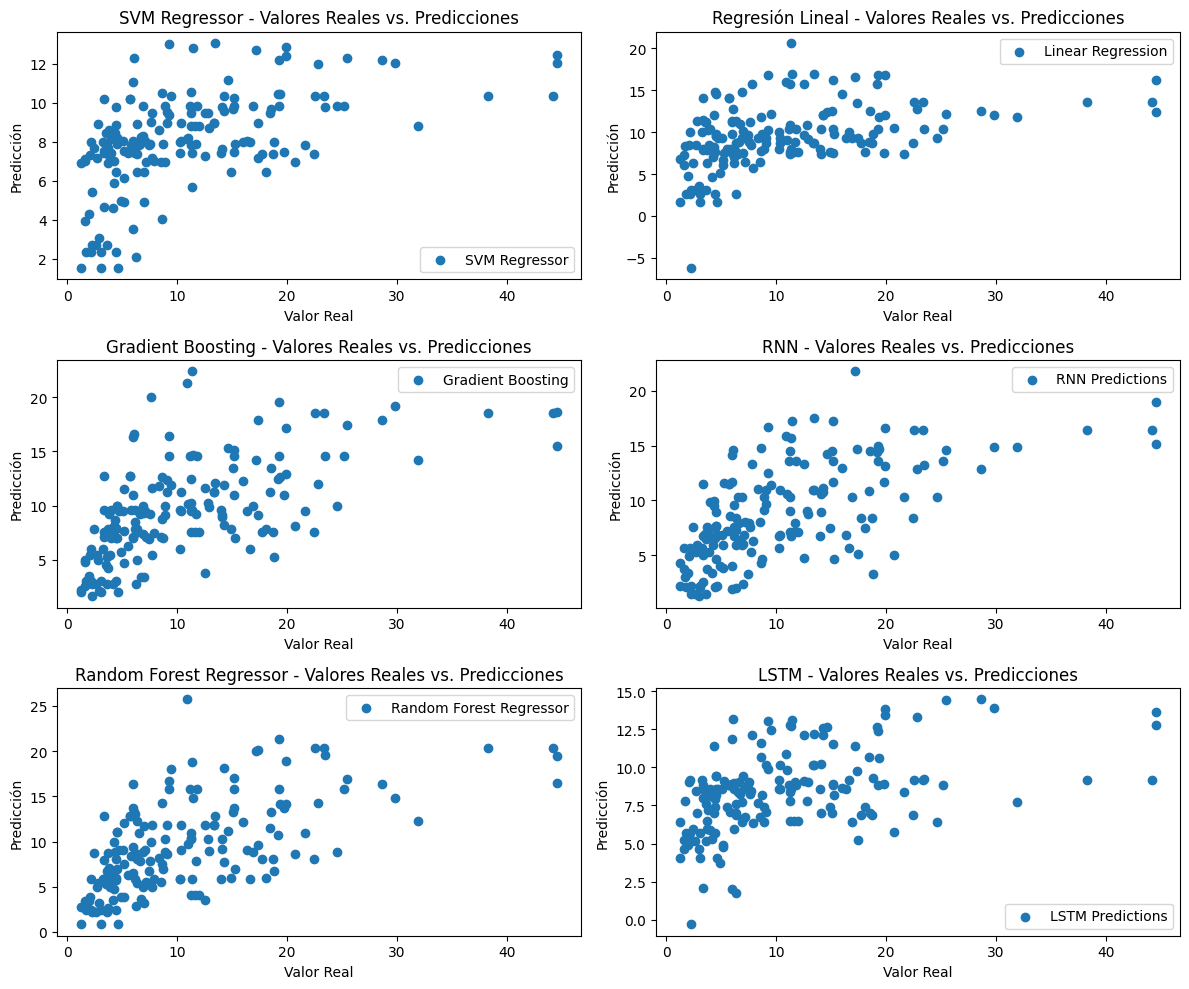

In [165]:
# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Gráfico para SVM Regressor
axes[0, 0].scatter(y_test, svm_predictions, label='SVM Regressor')
axes[0, 0].set_xlabel('Valor Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].set_title('SVM Regressor - Valores Reales vs. Predicciones')
axes[0, 0].legend()

# Gráfico para Regresión Lineal
axes[0, 1].scatter(y_test, linear_predictions, label='Linear Regression')
axes[0, 1].set_xlabel('Valor Real')
axes[0, 1].set_ylabel('Predicción')
axes[0, 1].set_title('Regresión Lineal - Valores Reales vs. Predicciones')
axes[0, 1].legend()

# Gráfico para Gradient Boosting
axes[1, 0].scatter(y_test, gb_predictions, label='Gradient Boosting')
axes[1, 0].set_xlabel('Valor Real')
axes[1, 0].set_ylabel('Predicción')
axes[1, 0].set_title('Gradient Boosting - Valores Reales vs. Predicciones')
axes[1, 0].legend()

# Gráfico para RNN
axes[1, 1].scatter(y_test, rnn_predictions, label='RNN Predictions')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Predicción')
axes[1, 1].set_title('RNN - Valores Reales vs. Predicciones')
axes[1, 1].legend()
# Gráfico para Random Forest Regressor
axes[2, 0].scatter(y_test, rf_predictions, label='Random Forest Regressor')
axes[2, 0].set_xlabel('Valor Real')
axes[2, 0].set_ylabel('Predicción')
axes[2, 0].set_title('Random Forest Regressor - Valores Reales vs. Predicciones')
axes[2, 0].legend()

# Gráfico para LSTM
axes[2, 1].scatter(y_test, lstm_predictions, label='LSTM Predictions')
axes[2, 1].set_xlabel('Valor Real')
axes[2, 1].set_ylabel('Predicción')
axes[2, 1].set_title('LSTM - Valores Reales vs. Predicciones')
axes[2, 1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

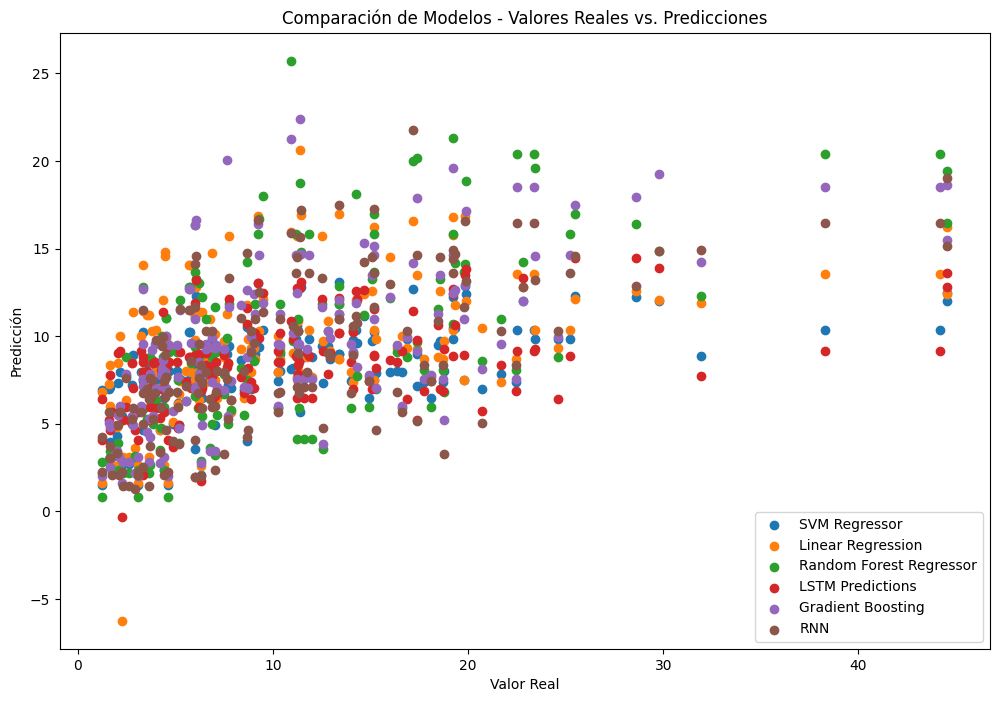

In [166]:
import matplotlib.pyplot as plt

# Crear un solo gráfico
plt.figure(figsize=(12, 8))

# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')

# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')
# Gráfico para Gradient Boosting
plt.scatter(y_test, gb_predictions, label='Gradient Boosting')

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN')
# Ajustar etiquetas y leyenda
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos - Valores Reales vs. Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()


# Comparación de métricas 

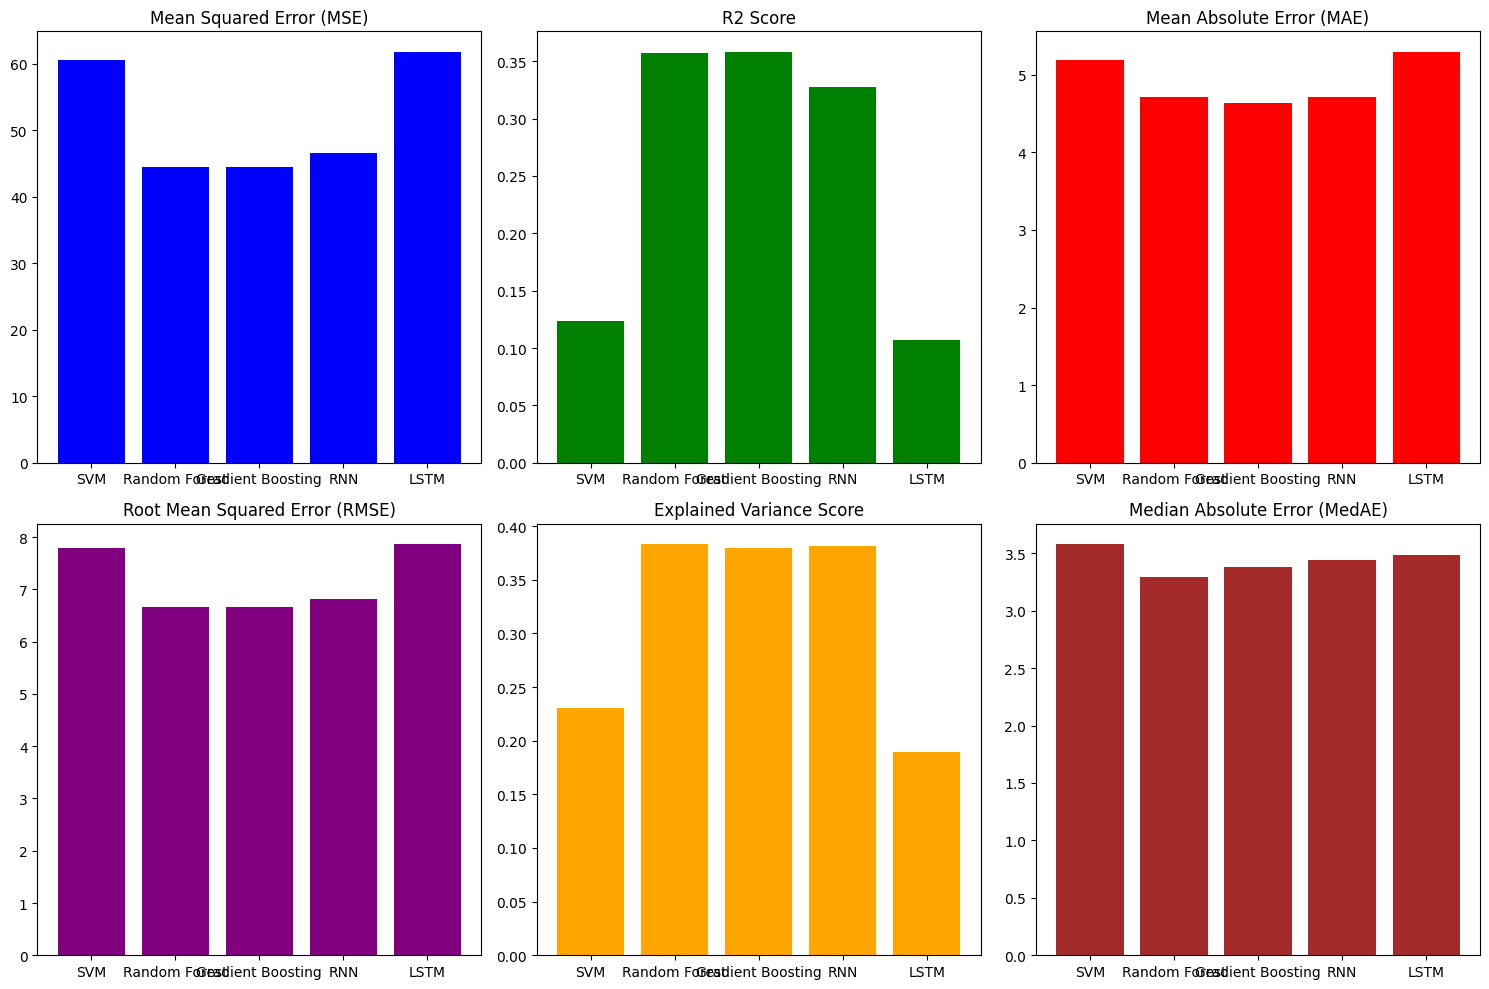

In [167]:
# Definir las métricas de cada modelo
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'RNN', 'LSTM']
mse_values = [svm_mse, rf_mse, gb_mse, rnn_mse, lstm_mse]
r2_values = [svm_r2, rf_r2, gb_r2, rnn_r2, lstm_r2]
mae_values = [svm_mae, rf_mae, gb_mae, rnn_mae, lstm_mae]
rmse_values = [svm_rmse, rf_rmse, gb_rmse, rnn_rmse, lstm_rmse]
explained_variance_values = [svm_explained_variance, rf_explained_variance, gb_explained_variance, rnn_explained_variance, lstm_explained_variance]
medae_values = [svm_medae, rf_medae, gb_medae, rnn_medae, lstm_medae]

# Crear subplots para cada métrica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# MSE
axes[0, 0].bar(model_names, mse_values, color='blue')
axes[0, 0].set_title('Mean Squared Error (MSE)')

# R2 Score
axes[0, 1].bar(model_names, r2_values, color='green')
axes[0, 1].set_title('R2 Score')

# MAE
axes[0, 2].bar(model_names, mae_values, color='red')
axes[0, 2].set_title('Mean Absolute Error (MAE)')

# RMSE
axes[1, 0].bar(model_names, rmse_values, color='purple')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# Explained Variance Score
axes[1, 1].bar(model_names, explained_variance_values, color='orange')
axes[1, 1].set_title('Explained Variance Score')

# Median Absolute Error
axes[1, 2].bar(model_names, medae_values, color='brown')
axes[1, 2].set_title('Median Absolute Error (MedAE)')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

5/5 [==============================] - 1s 5ms/step


5/5 [==============================] - 2s 10ms/step


5/5 [==============================] - 1s 7ms/step


5/5 [==============================] - 1s 7ms/step


5/5 [==============================] - 1s 8ms/step

Resultados de la validación cruzada (5 folds):
MSE por cada fold: [79.68749888 95.99187526 75.87792884 68.39626324 62.34929793]
MSE promedio: 76.4605728277883


3/3 [==============================] - 1s 35ms/step


3/3 [==============================] - 5s 10ms/step


3/3 [==============================] - 5s 17ms/step


3/3 [==============================] - 1s 5ms/step


3/3 [==============================] - 1s 5ms/step


3/3 [==============================] - 1s 10ms/step


3/3 [==============================] - 2s 5ms/step


3/3 [==============================] - 1s 5ms/step


3/3 [==============================] - 1s 5ms/step


3/3 [==============================] - 1s 10ms/step

Resultados de la validación cruzada (10 folds):
MSE por cada fold: [ 94.79002966  96.26988326 151.49297503  55.79969722 100.41705544
  81.12586146 115.98493754  69.23207064  53.84335653  76.05149131]
MSE promedio: 89.50073581031971


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 1s 0s/step


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 1s 11ms/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 1s 6ms/step


2/2 [==============================] - 1s 0s/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 1s 13ms/step


2/2 [==============================] - 1s 13ms/step


2/2 [==============================] - 1s 6ms/step


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 1s 7ms/step


2/2 [==============================] - 1s 10ms/step


2/2 [==============================] - 1s 13ms/step


2/2 [==============================] - 1s 13ms/step


2/2 [==============================] - 1s 11ms/step

Resultados de la validación cruzada (20 folds):
MSE por cada fold: [ 81.16658597  79.52134343 107.64161264  62.97399551 166.90149209
  80.94585025  52.84134943  61.59317953  98.47504253  69.67685621
  73.58603591  70.58131723  55.50241076 137.91129374  97.61415973
  49.06077979  74.24353567  42.7938041   64.14028398  92.18706035]
MSE promedio: 80.96789944329672


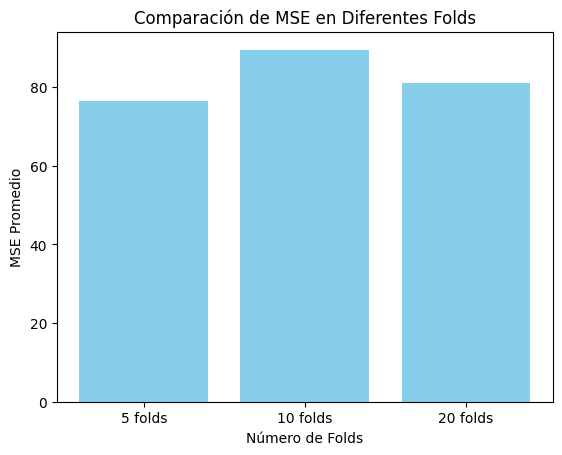

In [168]:
from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,make_scorer
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Supongamos que tienes tus datos X e y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()

# Crear el modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Crear el pipeline con el escalado y el modelo
pipeline = make_pipeline(scaler, model)

# Definir la métrica que deseas utilizar (por ejemplo, error cuadrático medio)
scorer = make_scorer(mean_squared_error)

# Inicializar listas para almacenar los resultados
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y, y_pred: sqrt(mean_squared_error(y, y_pred)), greater_is_better=False),
    'MedAE': make_scorer(median_absolute_error, greater_is_better=False),
    'R2 Score': make_scorer(r2_score),
    'Explained Variance': make_scorer(explained_variance_score)
}

for cv in [5, 10, 20]:
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)

    print(f"\nResultados de la validación cruzada ({cv} folds):")
    for metric, values in scores.items():
        print(f"{metric} por cada fold:", values)
        print(f"{metric} promedio:", np.mean(values))

# Graficar los resultados en un gráfico de barras
#plt.bar(scoring, avg_scores, color='skyblue')
#plt.xlabel('Número de Folds')
#plt.ylabel('MSE Promedio')
#plt.title('Comparación de MSE en Diferentes Folds')
#plt.show()


In [169]:
from joblib import dump
dump(model, 'Modelo.joblib')

['Modelo.joblib']

In [170]:
from joblib import load
dfExcel = pd.read_excel('../Test.xlsx')
df = dfExcel.drop(['E1', 'E2','E3','E4','E5','Plantas','hectareas','date','lote','Id_Lote','Cherelles','perdida'],axis=1)
X = df.drop(['qq'], axis=1)
y = df['qq']

# Cargar el modelo desde el archivo
loaded_model = load('Modelo.joblib')
predictions_prod = loaded_model.predict(X)
print(predictions_prod)

11/11 [==============================] - 2s 8ms/step
[[19.641682 ]
 [19.641682 ]
 [19.641682 ]
 [19.64499  ]
 [19.641682 ]
 [19.641682 ]
 [27.303423 ]
 [19.64499  ]
 [22.24651  ]
 [20.07565  ]
 [19.641682 ]
 [24.290596 ]
 [19.641682 ]
 [19.641682 ]
 [19.641682 ]
 [22.656603 ]
 [38.07986  ]
 [20.085678 ]
 [25.52356  ]
 [19.64499  ]
 [19.64499  ]
 [19.648083 ]
 [20.010798 ]
 [19.64499  ]
 [19.64499  ]
 [19.64499  ]
 [21.883896 ]
 [19.979519 ]
 [19.64499  ]
 [19.648083 ]
 [19.648083 ]
 [19.64499  ]
 [20.252155 ]
 [19.64499  ]
 [19.64499  ]
 [19.651272 ]
 [19.648083 ]
 [22.438633 ]
 [20.078407 ]
 [19.648083 ]
 [19.648083 ]
 [19.648083 ]
 [19.648083 ]
 [26.12732  ]
 [19.648083 ]
 [19.648083 ]
 [19.648083 ]
 [19.64499  ]
 [19.64499  ]
 [26.174889 ]
 [19.648083 ]
 [22.604374 ]
 [19.648083 ]
 [19.979235 ]
 [19.648083 ]
 [19.648083 ]
 [24.878305 ]
 [19.65427  ]
 [19.65427  ]
 [19.65427  ]
 [19.65427  ]
 [19.65427  ]
 [34.95177  ]
 [20.409546 ]
 [19.65427  ]
 [19.65427  ]
 [20.349566 ]
 [19.6542

In [171]:

df = pd.DataFrame(predictions_prod, columns=['Result'], index=None)
df['QQ'] = df['Result']*dfExcel['hectareas']
df['Id_Lote'] = dfExcel['Id_Lote']
df['date'] = dfExcel['date']
df['Lote'] = dfExcel['lote']
df['Lote'] = dfExcel['lote'].str.split('_', n=2).str[0]+"_"+dfExcel['lote'].str.split('_', n=2).str[1]

grouped_df = df.groupby([df['date'], df['Lote']])[['Result','QQ']].sum()

print(grouped_df)
print(df)


                   Result           QQ
date    Lote                          
2023-08 HV_V1  370.717773  2157.340367
        HV_V2  363.484772  2882.660431
        HV_V3  432.121094  2946.823621
        HV_V4  297.899902  1403.270360
2023-09 HV_V1  376.024841  2184.660100
        HV_V2  364.847137  2879.835093
        HV_V3  384.992035  2624.222511
        HV_V4  316.105438  1462.051066
2023-10 HV_V1  165.027847   984.449208
        HV_V2  177.182449  1393.772358
        HV_V3  190.217331  1297.310417
        HV_V4  139.975327   653.923727
2023-11 HV_V1  191.029510  1133.875999
        HV_V2  216.880203  1693.231675
        HV_V3  220.501831  1504.492259
        HV_V4  191.101669   883.397560
2023-12 HV_V1  343.747620  2044.267974
        HV_V2  360.482269  2867.886251
        HV_V3  418.314453  2851.370120
        HV_V4  279.508240  1329.996061
        Result          QQ  Id_Lote     date   Lote
0    19.641682   66.585301        1  2023-08  HV_V1
1    19.641682  138.081022       10  2

In [201]:
df = pd.DataFrame(predictions_prod, columns=['Result'], index=None)
df['Result'] = df['Result']
df['Id_Lote'] = dfExcel['Id_Lote']
df['date'] = dfExcel['date']
df['Lote'] = dfExcel['lote']
df['Lote'] = dfExcel['lote'].str.split('_', n=2).str[0]+"_"+dfExcel['lote'].str.split('_', n=2).str[1]
df = df.groupby([df['date'], df['Lote']])[['Result']].sum()
df.to_excel('Resultados.xlsx')
print(df)

                   Result
date    Lote             
2023-08 HV_V1  129.432687
        HV_V2  263.617330
        HV_V3  466.780037
        HV_V4  203.046633
2023-09 HV_V1   57.888830
        HV_V2  132.181375
        HV_V3  235.700322
        HV_V4   99.919644
2023-10 HV_V1   92.217573
        HV_V2  218.152041
        HV_V3  350.138777
        HV_V4  120.010078
2023-11 HV_V1  117.570690
        HV_V2  184.239572
        HV_V3  239.332860
        HV_V4  110.294316
2023-12 HV_V1   45.206567
        HV_V2   47.839920
        HV_V3   50.608653
        HV_V4   36.364717
